**Student: C0904838, Haldo Somoza**

**Date: Jun 26, 2024**

---
PROFESSOR INSTRUCTIONS: 

The Placement of students is one of the most important objective of an educational institution. Reputation and yearly admissions of an institution invariably depend on the placements it provides it students with. That is why all the institutions, arduously, strive to strengthen their placement department so as to improve their institution on a whole.

Any assistance in this particular area will have a positive impact on an institution’s ability to place its students. This will always be helpful to both the students, as well as the institution.

The main goal is to predict whether the student will be recruited in campus placements or not based on the available factors in the dataset.

Approach: The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

---
### Data Selection and Loading

Data was provided by professor: The dataset from this link https://www.kaggle.com/c/ml-with-python-course-project/data

In [46]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy  as np

In [47]:
# Loading the dataset
df = pd.read_csv('2024-06-18 - Assignment_2_Campus_Placement, DATA.csv')

In [48]:
# Displaying the columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


---
### Data Preprocessing and Exploratory data analysis (EDA)

• Handling missing values.

• Feature encoding for categorical columns and target variable.

• Data spliting into training and test sets (70% training, 30% test).

In [49]:
# Displaying first top rows to familiarize myself with the dataset
df.head(20)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,0,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,1,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,0,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,0,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,0,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [50]:
# Displaying the statistics to understand the dataset 
df.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [51]:
# Removing the sl_no  column because it value is a consecutive number
# Removing the salary column because it value is not the objetive of the analysis
df.drop(columns=['sl_no'],  inplace=True)
df.drop(columns=['salary'], inplace=True)

In [52]:
# Checking for missing values
df.isnull().sum()       # Resulting in no missing values

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [53]:
# Checking for duplicates
df.duplicated().sum()   # Resulting in no duplicates

0

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

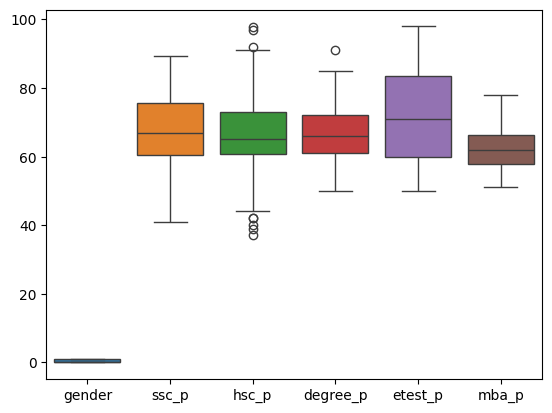

In [55]:
# Drawing box plots to check for outliers
sns.boxplot(df)

<Axes: >

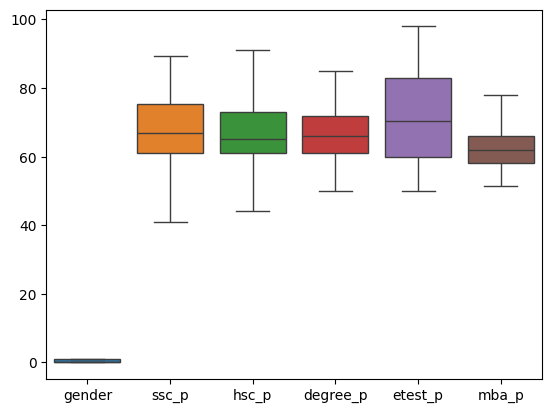

In [56]:
# Removing the outliers in hsc_p column 
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['hsc_p'] < (Q1 - 1.5 * IQR)) | (df['hsc_p'] > (Q3 + 1.5 * IQR)))]

# Removing the outliers in degree_p column 
Q1 = df['degree_p'].quantile(0.25)
Q3 = df['degree_p'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['degree_p'] < (Q1 - 1.5 * IQR)) | (df['degree_p'] > (Q3 + 1.5 * IQR)))]

sns.boxplot(df)

In [57]:
# Checking the shape of the dataset after cleaning outliers
df.shape

(206, 13)

In [58]:
# Scaling numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['gender', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']] = scaler.fit_transform(df[['gender', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']])
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,-0.733017,-0.045537,Others,2.528967,Others,Commerce,-1.169280,Sci&Tech,No,-1.294408,Mkt&HR,-0.603259,Placed
1,-0.733017,1.118422,Central,1.215202,Others,Science,1.585204,Sci&Tech,Yes,1.119619,Mkt&Fin,0.705320,Placed
2,-0.733017,-0.234338,Central,0.144075,Central,Arts,-0.320877,Comm&Mgmt,No,0.238307,Mkt&Fin,-0.778202,Placed
3,-0.733017,-1.083943,Central,-1.514980,Central,Science,-2.017684,Sci&Tech,No,-0.451414,Mkt&HR,-0.493044,Not Placed
4,-0.733017,1.729194,Central,0.724744,Central,Commerce,0.994150,Comm&Mgmt,No,1.908967,Mkt&Fin,-1.180573,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,-0.733017,1.238311,Others,1.595748,Others,Commerce,1.602172,Comm&Mgmt,No,1.464480,Mkt&Fin,2.141609,Placed
211,-0.733017,-0.895142,Others,-0.685452,Others,Science,0.810329,Sci&Tech,No,0.161672,Mkt&Fin,-1.509467,Placed
212,-0.733017,-0.045537,Others,0.040384,Others,Commerce,0.951729,Comm&Mgmt,Yes,-0.987865,Mkt&Fin,1.307127,Placed
213,1.364225,0.615267,Others,-0.063307,Others,Commerce,-1.169280,Comm&Mgmt,No,-0.144871,Mkt&HR,-0.353089,Placed


In [59]:
# Converting not numerical columns to numerical
# First, let's check the unique values of each not numeric column
for column in df.columns:
    if df[column].dtype == 'object':
        print(f'{column}: {df[column].unique()}')

ssc_b: ['Others' 'Central']
hsc_b: ['Others' 'Central']
hsc_s: ['Commerce' 'Science' 'Arts']
degree_t: ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex: ['No' 'Yes']
specialisation: ['Mkt&HR' 'Mkt&Fin']
status: ['Placed' 'Not Placed']


In [60]:
# Converting not numerical columns to numerical
# Assigning the values to the categorical columns identified
df['ssc_b']          = df['ssc_b']         .map({'Others':   0, 'Central':    1})
df['hsc_b']          = df['hsc_b']         .map({'Others':   0, 'Central':    1})
df['hsc_s']          = df['hsc_s']         .map({'Commerce': 0, 'Science':    1, 'Arts':   2})
df['degree_t']       = df['degree_t']      .map({'Sci&Tech': 0, 'Comm&Mgmt':  1, 'Others': 2})
df['workex']         = df['workex']        .map({'No':       0, 'Yes':        1})
df['specialisation'] = df['specialisation'].map({'Mkt&HR':   0, 'Mkt&Fin':    1})
df['status']         = df['status']        .map({'Placed':   0, 'Not Placed': 1})

df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,-0.733017,-0.045537,0,2.528967,0,0,-1.169280,0,0,-1.294408,0,-0.603259,0
1,-0.733017,1.118422,1,1.215202,0,1,1.585204,0,1,1.119619,1,0.705320,0
2,-0.733017,-0.234338,1,0.144075,1,2,-0.320877,1,0,0.238307,1,-0.778202,0
3,-0.733017,-1.083943,1,-1.514980,1,1,-2.017684,0,0,-0.451414,0,-0.493044,1
4,-0.733017,1.729194,1,0.724744,1,0,0.994150,1,0,1.908967,1,-1.180573,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,-0.733017,1.238311,0,1.595748,0,0,1.602172,1,0,1.464480,1,2.141609,0
211,-0.733017,-0.895142,0,-0.685452,0,1,0.810329,0,0,0.161672,1,-1.509467,0
212,-0.733017,-0.045537,0,0.040384,0,0,0.951729,1,1,-0.987865,1,1.307127,0
213,1.364225,0.615267,0,-0.063307,0,0,-1.169280,1,0,-0.144871,0,-0.353089,0


In [61]:
# Displaying the dataframe to ensure have only numerical data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          206 non-null    float64
 1   ssc_p           206 non-null    float64
 2   ssc_b           206 non-null    int64  
 3   hsc_p           206 non-null    float64
 4   hsc_b           206 non-null    int64  
 5   hsc_s           206 non-null    int64  
 6   degree_p        206 non-null    float64
 7   degree_t        206 non-null    int64  
 8   workex          206 non-null    int64  
 9   etest_p         206 non-null    float64
 10  specialisation  206 non-null    int64  
 11  mba_p           206 non-null    float64
 12  status          206 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 22.5 KB


In [62]:
# Displaying the statistics from dataset 
df.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
count,2.060000e+02,2.060000e+02,206.000000,2.060000e+02,206.000000,206.000000,2.060000e+02,206.000000,206.000000,2.060000e+02,206.000000,2.060000e+02,206.000000
mean,-1.379695e-16,-2.328235e-16,0.548544,-6.812242e-16,0.398058,0.509709,-2.500697e-16,0.771845,0.349515,-2.290509e-16,0.558252,1.261127e-16,0.300971
std,1.002436e+00,1.002436e+00,0.498850,1.002436e+00,0.490690,0.590496,1.002436e+00,0.514553,0.477978,1.002436e+00,0.497805,1.002436e+00,0.459797
min,-7.330167e-01,-2.510336e+00,0.000000,-2.344508e+00,0.000000,0.000000,-2.300486e+00,0.000000,0.000000,-1.677587e+00,0.000000,-1.917086e+00,0.000000
25%,-7.330167e-01,-6.119402e-01,0.000000,-5.817615e-01,0.000000,0.000000,-7.450785e-01,0.000000,0.000000,-9.112291e-01,0.000000,-7.344664e-01,0.000000
50%,-7.330167e-01,-4.553682e-02,1.000000,-1.669978e-01,0.000000,0.000000,-3.807522e-02,1.000000,0.000000,-1.065535e-01,1.000000,-5.218589e-02,0.000000
75%,1.364225e+00,7.427079e-01,1.000000,6.625297e-01,1.000000,1.000000,8.078542e-01,1.000000,1.000000,8.448796e-01,1.000000,6.659581e-01,1.000000
max,1.364225e+00,2.069036e+00,1.000000,2.528967e+00,1.000000,2.000000,2.648537e+00,2.000000,1.000000,2.000930e+00,1.000000,2.736417e+00,1.000000


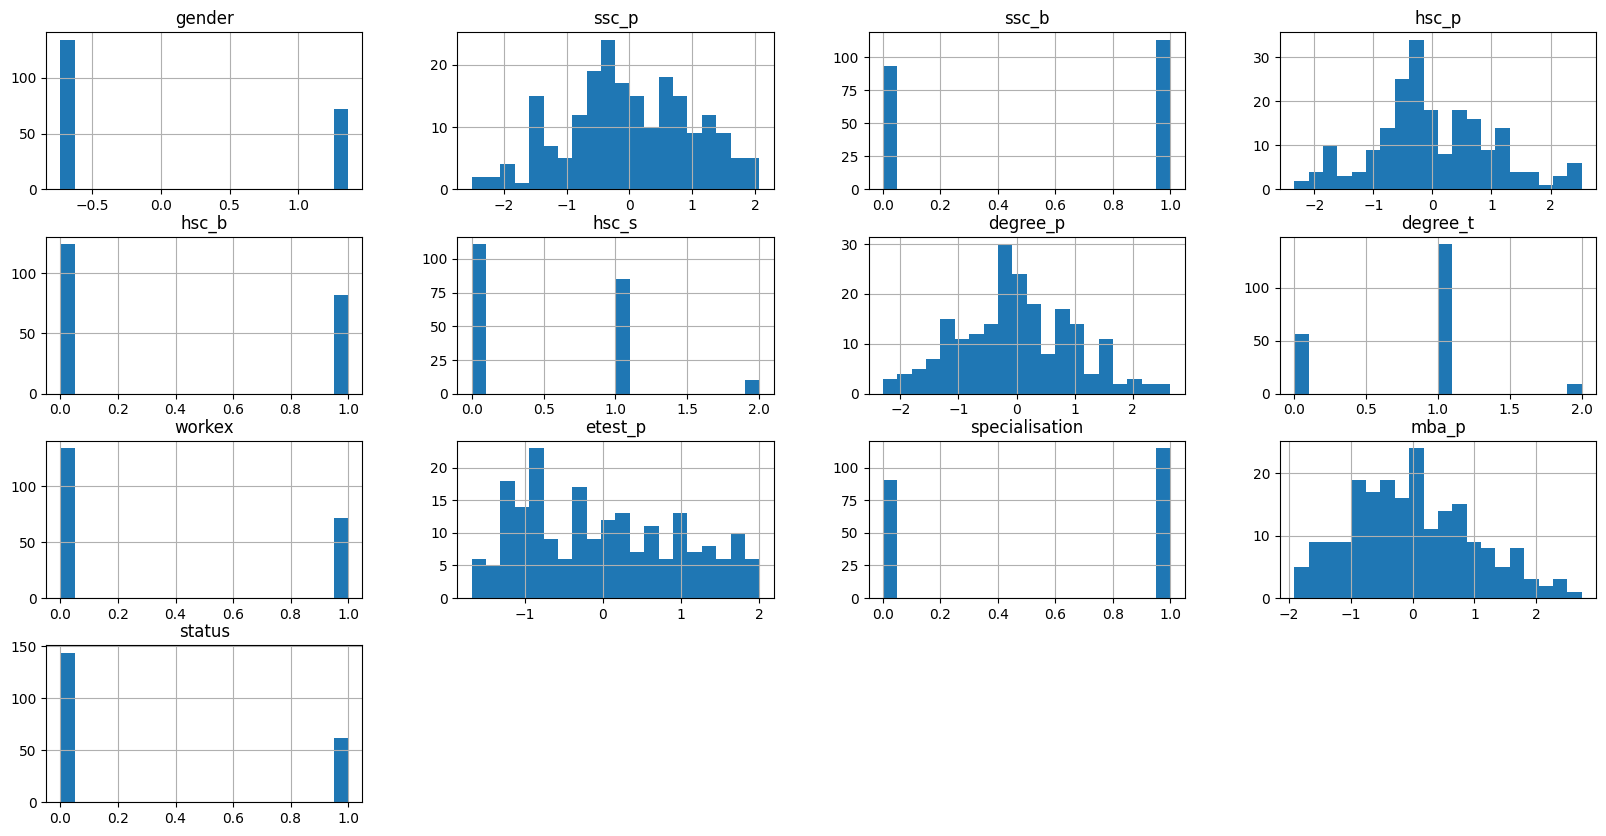

In [63]:
# Plotting histograms for numerical features
df.hist(bins=20, figsize=(20, 10))
plt.show()  

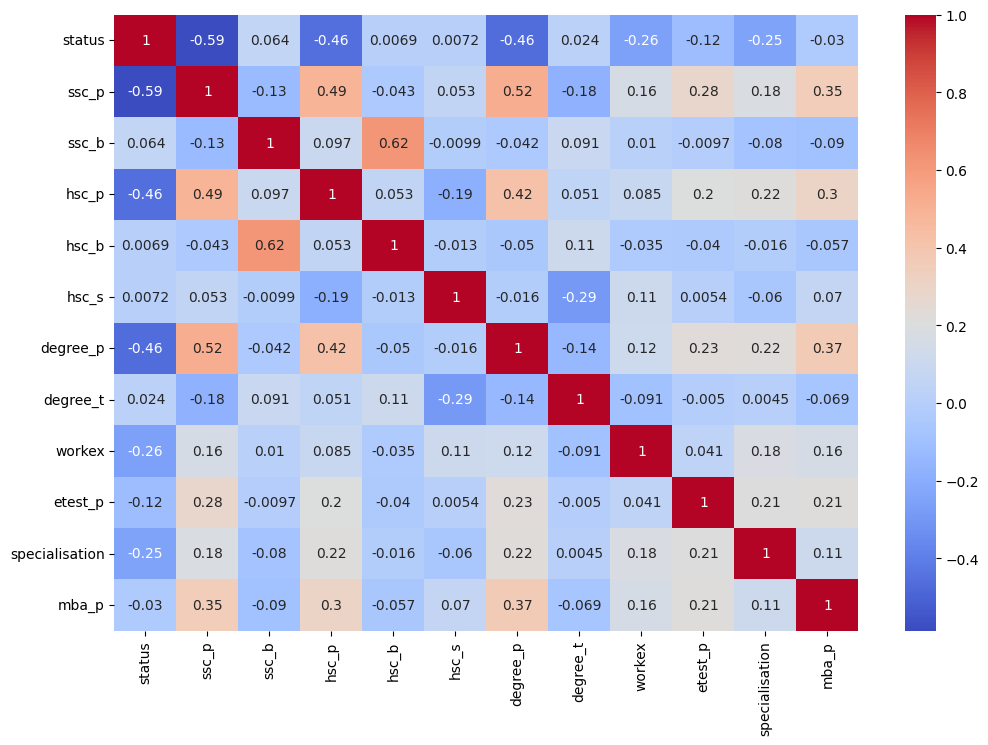

In [64]:
# Showing the correlation matrix focusing on the status target feature 
df = df[['status', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']]
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [65]:
# Removing the columns with lower correlation with the target feature
df.drop(columns=['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'etest_p', 'mba_p'], inplace=True)

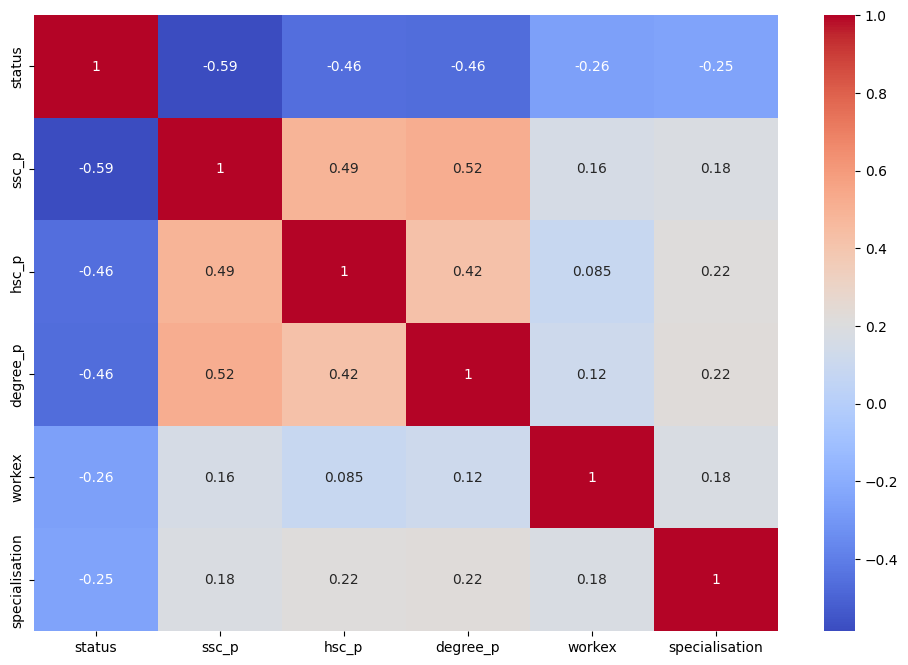

In [66]:
# Showing the correlation matrix again
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [67]:
# Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X = df.drop(columns=['status'])
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Showing the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((144, 5), (62, 5), (144,), (62,))

---
### Model Selection through Grid Search

• Four different models were chosen.

• Evaluated with different hyperparameters.

In [68]:
# Choosing the models to train the dataset
# Next models will be used: Naive Bayes, Support Vector Machine, Logistic Regression, Decision Tree
# because they are the adecuated for classification problems for small datasets (like this one 200 rows)
from sklearn.naive_bayes  import GaussianNB             # Naive Bayes
from sklearn.svm          import LinearSVC              # Support Vector Machine
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.tree         import DecisionTreeClassifier # Decision Tree

In [69]:
# Evaluating the metrics for the chosen models withj multiple hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

models = { 
    'GaussianNB'            : GaussianNB(), 
    'LinearSVC'             : LinearSVC(), 
    'LogisticRegression'    : LogisticRegression(), 
    'DecisionTreeClassifier': DecisionTreeClassifier() 
}

params_grids = { 
    'GaussianNB':             { 'priors': [None] },
    'LinearSVC':              { 'max_iter': [10, 100, 1000], 'loss': ['hinge', 'squared_hinge'] },
    'LogisticRegression':     { 'max_iter': [10, 100, 1000], 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] },
    'DecisionTreeClassifier': { 'max_depth': [5, 10, 20],    'criterion': ['gini', 'entropy'],              'max_features': [1, 2, 3, 4, 5] }
}

best_estimators = { }
best_scores_r2  = { }
best_scores_mse = { }
best_scores_acc = { }

for name, model in models.items():
    print(f"Performing Grid Search for {name} ...")

    grid = GridSearchCV(estimator=model, param_grid=params_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)

    y_test_pred = grid.best_estimator_.predict(X_test)
    best_estimators[name] = grid.best_estimator_
    best_scores_r2 [name] = r2_score          (y_test, y_test_pred)
    best_scores_mse[name] = mean_squared_error(y_test, y_test_pred)
    best_scores_acc[name] = accuracy_score    (y_test, y_test_pred)

    print(f"Model evaluated: {name}")
    print(f"Best params:     {grid.best_params_}")
    print(f"Test R2 Score:   {best_scores_r2 [name]}")
    print(f"Test MSE:        {best_scores_mse[name]}")
    print(f"Test Accuracy:   {best_scores_acc[name]}\n")

Performing Grid Search for GaussianNB ...
Model evaluated: GaussianNB
Best params:     {'priors': None}
Test R2 Score:   0.3843971631205674
Test MSE:        0.11290322580645161
Test Accuracy:   0.8870967741935484

Performing Grid Search for LinearSVC ...
Model evaluated: LinearSVC
Best params:     {'loss': 'hinge', 'max_iter': 10}
Test R2 Score:   0.2085106382978723
Test MSE:        0.14516129032258066
Test Accuracy:   0.8548387096774194

Performing Grid Search for LogisticRegression ...
Model evaluated: LogisticRegression
Best params:     {'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Test R2 Score:   0.12056737588652489
Test MSE:        0.16129032258064516
Test Accuracy:   0.8387096774193549

Performing Grid Search for DecisionTreeClassifier ...
Model evaluated: DecisionTreeClassifier
Best params:     {'criterion': 'entropy', 'max_depth': 10, 'max_features': 4}
Test R2 Score:   -0.8468085106382979
Test MSE:        0.3387096774193548
Test Accuracy:   0.6612903225806451



Because of previous metrics, I chose GaussianNB (Naive Bayes) because:
- Higher R2 Scoring: indicating a better relation between dependent variables and target variables.
- Lower MSE: indicating less error between the predicted and the actual values.
- Better Accuracy: indicating the major percentage of correct predictions.

---
### Model Selection through Voting Classifier

In [83]:
# Implementing a Voting Classifier with the best models
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=estimators, voting='hard')
voting.fit(X_train, y_train)
y_test_pred_voting = voting.predict(X_test)

# Showing the models used, best scores, and the Voting model scores
print(f'Models evaluated:')
for estimator in voting.estimators_: print(estimator)
print()

print(f'Scores of Voting Model selected:')
print(f'Test R2 Score: {r2_score           (y_test, y_test_pred_voting)}')
print(f'Test MSE:      {mean_squared_error (y_test, y_test_pred_voting)}')
print(f'Test Accuracy: {accuracy_score     (y_test, y_test_pred_voting)}')

Models evaluated:
GaussianNB()
LinearSVC(loss='hinge', max_iter=10)
LogisticRegression(penalty='l1', solver='saga')
DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=4)

Scores of Voting Model selected:
Test R2 Score: -0.05531914893617018
Test MSE:      0.1935483870967742
Test Accuracy: 0.8064516129032258


---
### Model Training and Evaluation of Chosen Model

In [79]:
# Training with Naive Bayes the test data 
nb = GaussianNB()
nb.fit(X_train, y_train)
y_train_pred_nb = nb.predict(X_train)
y_test_pred_nb  = nb.predict(X_test)

print(f'Naive Bayes Model over TRAIN Dataset:')
print(f'Naive Bayes Model, R2 Score: {r2_score           (y_train, y_train_pred_nb)}')
print(f'Naive Bayes Model, MSE:      {mean_squared_error (y_train, y_train_pred_nb)}')
print(f'Naive Bayes Model, Accuracy: {accuracy_score     (y_train, y_train_pred_nb)}')

print(f'\nNaive Bayes Model over TEST  Dataset:')
print(f'Naive Bayes Model, R2 Score: {r2_score           (y_test, y_test_pred_nb)}')
print(f'Naive Bayes Model, MSE:      {mean_squared_error (y_test, y_test_pred_nb)}')
print(f'Naive Bayes Model, Accuracy: {accuracy_score     (y_test, y_test_pred_nb)}')

Naive Bayes Model over TRAIN Dataset:
Naive Bayes Model, R2 Score: 0.11559552533450312
Naive Bayes Model, MSE:      0.19444444444444445
Naive Bayes Model, Accuracy: 0.8055555555555556

Naive Bayes Model over TEST  Dataset:
Naive Bayes Model, R2 Score: 0.3843971631205674
Naive Bayes Model, MSE:      0.11290322580645161
Naive Bayes Model, Accuracy: 0.8870967741935484


In [26]:
# Showing the test dataset, the actual result, and the predicted result together
df_show = pd.DataFrame(data={'X_test': X_test.values.tolist(), 'y_test': y_test.values.tolist(), 'y_test_pred_nb': y_test_pred_nb.tolist()})
df_show.sample(20)

,X_test,y_test,y_test_pred_nb
5,"[-2.1223493512611356, -0.9965252989818831, -1....",1,1
37,"[0.6152671692142362, -0.47807060073343055, 0.2...",0,0
57,"[-1.404905021757245, -0.10685703678753872, 0.8...",0,1
36,"[0.5208665995426717, -0.37437966108374005, -0....",0,0
40,"[-0.0927371033224979, 0.01964590958508358, 0.4...",0,0
2,"[1.2383109290465617, 1.5957481922603796, 1.602...",0,0
38,"[-0.4231390971729738, -0.6854524800328116, -1....",0,0
44,"[-0.4231390971729738, 0.5588387957634745, 0.24...",0,0
11,"[1.1816705872436235, 1.3883663129609987, 0.810...",0,0
59,"[1.5592728659298816, 0.8699116147125461, 0.386...",0,0


              precision    recall  f1-score   support

           0       0.93      0.91      0.92        47
           1       0.75      0.80      0.77        15

    accuracy                           0.89        62
   macro avg       0.84      0.86      0.85        62
weighted avg       0.89      0.89      0.89        62



Text(-4.277777777777779, 0.5, 'Actual')

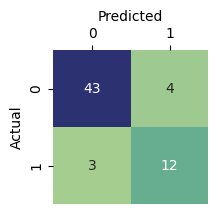

In [80]:
# Showing the classification report for the Naive Bayes model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_nb))

# Showing the confusion matrix for the Naive Bayes model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred_nb)
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Predicted')
plt.ylabel('Actual')

---
### 7. Report 
The documentation is included in the code and in markdown cells.